In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2015-01-15"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-01-15   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425   Ìï¥Ïö¥ÎåÄÍµ¨  10680   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2015-01-15     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   3963   Ìï¥Ïö¥ÎåÄÍµ¨   6550   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2015-01-15    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3429   Ìï¥Ïö¥ÎåÄÍµ¨   3870   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2015-01-15     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2083   Ìï¥Ïö¥ÎåÄÍµ¨   3050   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2015-01-15    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5800   Ìï¥Ïö¥ÎåÄÍµ¨   8900   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2015-01-15     ÎåÄÌåå                      1.0„éè   2059   Ìï¥Ïö¥ÎåÄÍµ¨   3296   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2015-01-15   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7750   Ìï¥Ïö¥ÎåÄÍµ¨  12500   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2015-01-15     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   2873   Ìï¥Ïö¥ÎåÄÍµ¨   4200   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2015-01-15     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634   Ìï¥Ïö¥ÎåÄÍµ¨    634   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2015-01-15     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Ìï¥Ïö¥ÎåÄÍµ¨   1240   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2015-01-15      Î¨¥                   2.0„éè 1Í∞ú   1380   Ìï¥Ïö¥ÎåÄÍµ¨   2205   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2015-01-15    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3400   Ìï¥Ïö¥ÎåÄÍµ¨   3430   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2015-01-15     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2480   Ìï¥Ïö¥ÎåÄÍµ¨   3157   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2015-01-15      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  17427   Ìï¥Ïö¥ÎåÄÍµ¨  38181   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2015-01-15     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞    804   Ìï¥Ïö¥ÎåÄÍµ¨   1284   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2015-01-15  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3465   Ìï¥Ïö¥ÎåÄÍµ¨   6701   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2015-01-15   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13200   Ìï¥Ïö¥ÎåÄÍµ¨  13850   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2015-01-15     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14306   Ìï¥Ïö¥ÎåÄÍµ¨  18505   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2015-01-15    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2208   Ìï¥Ïö¥ÎåÄÍµ¨   2240   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2015-01-15     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1600   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2015-01-15     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060   Ìï¥Ïö¥ÎåÄÍµ¨   1090   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2015-01-15    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29900   Ìï¥Ïö¥ÎåÄÍµ¨  40500   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2015-01-15      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800   Ìï¥Ïö¥ÎåÄÍµ¨  45500   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2015-01-15     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1065   Ìï¥Ïö¥ÎåÄÍµ¨   1760   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2015-01-15     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    730   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2015-01-15    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Ìï¥Ïö¥ÎåÄÍµ¨   6600   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2015-01-15   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2245   Ìï¥Ïö¥ÎåÄÍµ¨   2430   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2015-01-15     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1580   Ìï¥Ïö¥ÎåÄÍµ¨   2490   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    3255   43.84%   8,756  
1    2587   65.28%   5,588  
2     441   12.86%   3,650  
3     967   46.42%   2,678  
4    3100   53.45%   7,407  
5    1237   60.08%   2,526  
6    4750   61.29%  10,267  
7    1327   46.19%   3,686  
8       0     0.0%     634  
9       0     0.0%   1,240  
10    825   59.78%   1,792  
11     30    0.88%   3,420  
12    677    27.3%   2,706  
13  20754  119.09%  27,951  
14    480    59.7%   1,056  
15   3236   93.39%   5,555  
16    650    4.92%  13,633  
17   4199   29.35%  15,962  
18     32    1.45%   2,223  
19     30    1.88%   1,610  
20     30    2.83%   1,070  
21  10600   35.45%  35,967  
22   5700   14.32%  43,267  
23    695   65.26%   1,387  
24      0     0.0

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2015-04-02"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-04-02   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7395   Ìï¥Ïö¥ÎåÄÍµ¨  10680   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2015-04-02     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   3963   Ìï¥Ïö¥ÎåÄÍµ¨   6550   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2015-04-02    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6376   Ìï¥Ïö¥ÎåÄÍµ¨   6376   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2015-04-02     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2050   Ìï¥Ïö¥ÎåÄÍµ¨   3050   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2015-04-02    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6106   Ìï¥Ïö¥ÎåÄÍµ¨   7550   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2015-04-02     ÎåÄÌåå                      1.0„éè   2303   Ìï¥Ïö¥ÎåÄÍµ¨   3750   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2015-04-02   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7900   Ìï¥Ïö¥ÎåÄÍµ¨  12500   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2015-04-02     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868   Ìï¥Ïö¥ÎåÄÍµ¨   4200   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2015-04-02     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634   Ìï¥Ïö¥ÎåÄÍµ¨    634   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2015-04-02     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Ìï¥Ïö¥ÎåÄÍµ¨   1240   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2015-04-02      Î¨¥                   2.0„éè 1Í∞ú   1349   Ìï¥Ïö¥ÎåÄÍµ¨   1941   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2015-04-02    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3400   Ìï¥Ïö¥ÎåÄÍµ¨   3430   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2015-04-02     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3300   Ìï¥Ïö¥ÎåÄÍµ¨   6250   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2015-04-02      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  38360   Ìï¥Ïö¥ÎåÄÍµ¨  38360   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2015-04-02     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1270   Ìï¥Ïö¥ÎåÄÍµ¨   1885   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2015-04-02  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2765   Ìï¥Ïö¥ÎåÄÍµ¨   6683   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2015-04-02   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850   Ìï¥Ïö¥ÎåÄÍµ¨  13850   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2015-04-02     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14093   Ìï¥Ïö¥ÎåÄÍµ¨  20778   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2015-04-02    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2440   Ìï¥Ïö¥ÎåÄÍµ¨   2780   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2015-04-02     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1570   Ìï¥Ïö¥ÎåÄÍµ¨   1600   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2015-04-02     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060   Ìï¥Ïö¥ÎåÄÍµ¨   1090   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2015-04-02    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29500   Ìï¥Ïö¥ÎåÄÍµ¨  36000   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2015-04-02    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Ìï¥Ïö¥ÎåÄÍµ¨   6950   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2015-04-02      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  35900   Ìï¥Ïö¥ÎåÄÍµ¨  44500   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2015-04-02     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1310   Ìï¥Ïö¥ÎåÄÍµ¨   1402   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2015-04-02     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    730   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2015-04-02    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Ìï¥Ïö¥ÎåÄÍµ¨   6600   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2015-04-02   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2245   Ìï¥Ïö¥ÎåÄÍµ¨   2580   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2015-04-02     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980   Ìï¥Ïö¥ÎåÄÍµ¨   3096   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2015-04-02    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11925   Ìï¥Ïö¥ÎåÄÍµ¨  20637   Ìï¥Ïö¥ÎåÄÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   3285  44.42%   8,750  
1   2587  65.28%   5,588  
2      0    0.0%   6,376  
3   1000  48.78%   2,633  
4   1444  23.65%   6,719  
5   1447  62.83%   2,999  
6   4600  58.23%  10,483  
7    332   8.58%   4,015  
8      0    0.0%     634  
9      0    0.0%   1,240  
10   592  43.88%   1,605  
11    30   0.88%   3,420  
12  2950  89.39%   5,064  
13     0    0.0%  38,360  
14   615  48.43%   1,530  
15  3918  141.7%   5,316  
16     0    0.0%  13,850  
17  6685  47.43%  16,879 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2015-07-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-07-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8162   Ìï¥Ïö¥ÎåÄÍµ¨  10680   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2015-07-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   3755   Ìï¥Ïö¥ÎåÄÍµ¨   6550   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2015-07-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2714   Ìï¥Ïö¥ÎåÄÍµ¨   4651   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2015-07-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2050   Ìï¥Ïö¥ÎåÄÍµ¨   2900   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2015-07-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7522   Ìï¥Ïö¥ÎåÄÍµ¨   8500   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2015-07-09     ÎåÄÌåå                      1.0„éè   3141   Ìï¥Ïö¥ÎåÄÍµ¨   4458   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2015-07-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  10550   Ìï¥Ïö¥ÎåÄÍµ¨  12000   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2015-07-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868   Ìï¥Ïö¥ÎåÄÍµ¨   7300   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2015-07-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634   Ìï¥Ïö¥ÎåÄÍµ¨    634   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2015-07-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Ìï¥Ïö¥ÎåÄÍµ¨   1280   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2015-07-09      Î¨¥                   2.0„éè 1Í∞ú   1680   Ìï¥Ïö¥ÎåÄÍµ¨   2754   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2015-07-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3400   Ìï¥Ïö¥ÎåÄÍµ¨   3430   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2015-07-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9176   Ìï¥Ïö¥ÎåÄÍµ¨  10420   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2015-07-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  33428   Ìï¥Ïö¥ÎåÄÍµ¨  33428   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2015-07-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1534   Ìï¥Ïö¥ÎåÄÍµ¨   2954   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2015-07-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2765   Ìï¥Ïö¥ÎåÄÍµ¨   6500   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2015-07-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12500   Ìï¥Ïö¥ÎåÄÍµ¨  15100   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2015-07-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  20989   Ìï¥Ïö¥ÎåÄÍµ¨  25909   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2015-07-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1650   Ìï¥Ïö¥ÎåÄÍµ¨   2440   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2015-07-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2015-07-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060   Ìï¥Ïö¥ÎåÄÍµ¨   1100   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2015-07-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34500   Ìï¥Ïö¥ÎåÄÍµ¨  39000   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2015-07-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4860   Ìï¥Ïö¥ÎåÄÍµ¨   6950   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2015-07-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44500   Ìï¥Ïö¥ÎåÄÍµ¨  53800   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2015-07-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2040   Ìï¥Ïö¥ÎåÄÍµ¨   2794   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2015-07-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    730   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2015-07-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Ìï¥Ïö¥ÎåÄÍµ¨   7200   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2015-07-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2430   Ìï¥Ïö¥ÎåÄÍµ¨   2625   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2015-07-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   1980   Ìï¥Ïö¥ÎåÄÍµ¨   2780   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2015-07-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11624   Ìï¥Ïö¥ÎåÄÍµ¨  14414   Ìï¥Ïö¥ÎåÄÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   2518   30.85%   9,006  
1   2795   74.43%   5,518  
2   1937   71.37%   3,936  
3    850   41.46%   2,517  
4    978    13.0%   8,011  
5   1317   41.93%   3,762  
6   1450   13.74%  11,150  
7   3432   88.73%   5,123  
8      0     0.0%     634  
9     40    3.23%   1,253  
10  1074   63.93%   2,086  
11    30    0.88%   3,420  
12  1244   13.56%   9,842  
13     0     0.0%  33,428  
14  1420   92.57%   2,120  
15  3735  135.08%   4,217  
16  2600    20.8%  13,827  
17  492

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Ìï¥Ïö¥ÎåÄÍµ¨"
region_code = "18"
target_date = "2015-10-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2015-10-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7604   Ìï¥Ïö¥ÎåÄÍµ¨  17880   Ìï¥Ïö¥ÎåÄÍµ¨   
1   2015-10-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   3755   Ìï¥Ïö¥ÎåÄÍµ¨   6880   Ìï¥Ïö¥ÎåÄÍµ¨   
2   2015-10-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3300   Ìï¥Ïö¥ÎåÄÍµ¨   3804   Ìï¥Ïö¥ÎåÄÍµ¨   
3   2015-10-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2033   Ìï¥Ïö¥ÎåÄÍµ¨   2900   Ìï¥Ïö¥ÎåÄÍµ¨   
4   2015-10-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   4980   Ìï¥Ïö¥ÎåÄÍµ¨   5752   Ìï¥Ïö¥ÎåÄÍµ¨   
5   2015-10-08     ÎåÄÌåå                      1.0„éè   3573   Ìï¥Ïö¥ÎåÄÍµ¨   4457   Ìï¥Ïö¥ÎåÄÍµ¨   
6   2015-10-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6750   Ìï¥Ïö¥ÎåÄÍµ¨   9250   Ìï¥Ïö¥ÎåÄÍµ¨   
7   2015-10-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3868   Ìï¥Ïö¥ÎåÄÍµ¨   4200   Ìï¥Ïö¥ÎåÄÍµ¨   
8   2015-10-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    634   Ìï¥Ïö¥ÎåÄÍµ¨    634   Ìï¥Ïö¥ÎåÄÍµ¨   
9   2015-10-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1240   Ìï¥Ïö¥ÎåÄÍµ¨   1350   Ìï¥Ïö¥ÎåÄÍµ¨   
10  2015-10-08      Î¨¥                   2.0„éè 1Í∞ú   1380   Ìï¥Ïö¥ÎåÄÍµ¨   3571   Ìï¥Ïö¥ÎåÄÍµ¨   
11  2015-10-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3400   Ìï¥Ïö¥ÎåÄÍµ¨   3430   Ìï¥Ïö¥ÎåÄÍµ¨   
12  2015-10-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   4980   Ìï¥Ïö¥ÎåÄÍµ¨   6900   Ìï¥Ïö¥ÎåÄÍµ¨   
13  2015-10-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  20454   Ìï¥Ïö¥ÎåÄÍµ¨  29575   Ìï¥Ïö¥ÎåÄÍµ¨   
14  2015-10-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1143   Ìï¥Ïö¥ÎåÄÍµ¨   2294   Ìï¥Ïö¥ÎåÄÍµ¨   
15  2015-10-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   2590   Ìï¥Ïö¥ÎåÄÍµ¨   6774   Ìï¥Ïö¥ÎåÄÍµ¨   
16  2015-10-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13680   Ìï¥Ïö¥ÎåÄÍµ¨  14500   Ìï¥Ïö¥ÎåÄÍµ¨   
17  2015-10-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú   8602   Ìï¥Ïö¥ÎåÄÍµ¨  10489   Ìï¥Ïö¥ÎåÄÍµ¨   
18  2015-10-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1950   Ìï¥Ïö¥ÎåÄÍµ¨   2450   Ìï¥Ïö¥ÎåÄÍµ¨   
19  2015-10-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1630   Ìï¥Ïö¥ÎåÄÍµ¨   1630   Ìï¥Ïö¥ÎåÄÍµ¨   
20  2015-10-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1060   Ìï¥Ïö¥ÎåÄÍµ¨   1070   Ìï¥Ïö¥ÎåÄÍµ¨   
21  2015-10-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  37500   Ìï¥Ïö¥ÎåÄÍµ¨  44500   Ìï¥Ïö¥ÎåÄÍµ¨   
22  2015-10-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950   Ìï¥Ïö¥ÎåÄÍµ¨   6950   Ìï¥Ïö¥ÎåÄÍµ¨   
23  2015-10-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44500   Ìï¥Ïö¥ÎåÄÍµ¨  53800   Ìï¥Ïö¥ÎåÄÍµ¨   
24  2015-10-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2323   Ìï¥Ïö¥ÎåÄÍµ¨   2772   Ìï¥Ïö¥ÎåÄÍµ¨   
25  2015-10-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730   Ìï¥Ïö¥ÎåÄÍµ¨    730   Ìï¥Ïö¥ÎåÄÍµ¨   
26  2015-10-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600   Ìï¥Ïö¥ÎåÄÍµ¨   6600   Ìï¥Ïö¥ÎåÄÍµ¨   
27  2015-10-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2430   Ìï¥Ïö¥ÎåÄÍµ¨   2895   Ìï¥Ïö¥ÎåÄÍµ¨   
28  2015-10-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2230   Ìï¥Ïö¥ÎåÄÍµ¨   2780   Ìï¥Ïö¥ÎåÄÍµ¨   
29  2015-10-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  16036   Ìï¥Ïö¥ÎåÄÍµ¨  20637   Ìï¥Ïö¥ÎåÄÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   10276  135.14%  11,220  
1    3125   83.22%   5,128  
2     504   15.27%   3,593  
3     867   42.65%   2,511  
4     772    15.5%   5,366  
5     884   24.74%   4,118  
6    2500   37.04%   7,833  
7     332    8.58%   4,089  
8       0     0.0%     634  
9     110    8.87%   1,293  
10   2191  158.77%   2,196  
11     30    0.88%   3,420  
12   1920   38.55%   6,182  
13   9121   44.59%  24,299  
14   1151   100.7%   1,763  
15   4184  161.54%   4,121  
16    820    5.99%

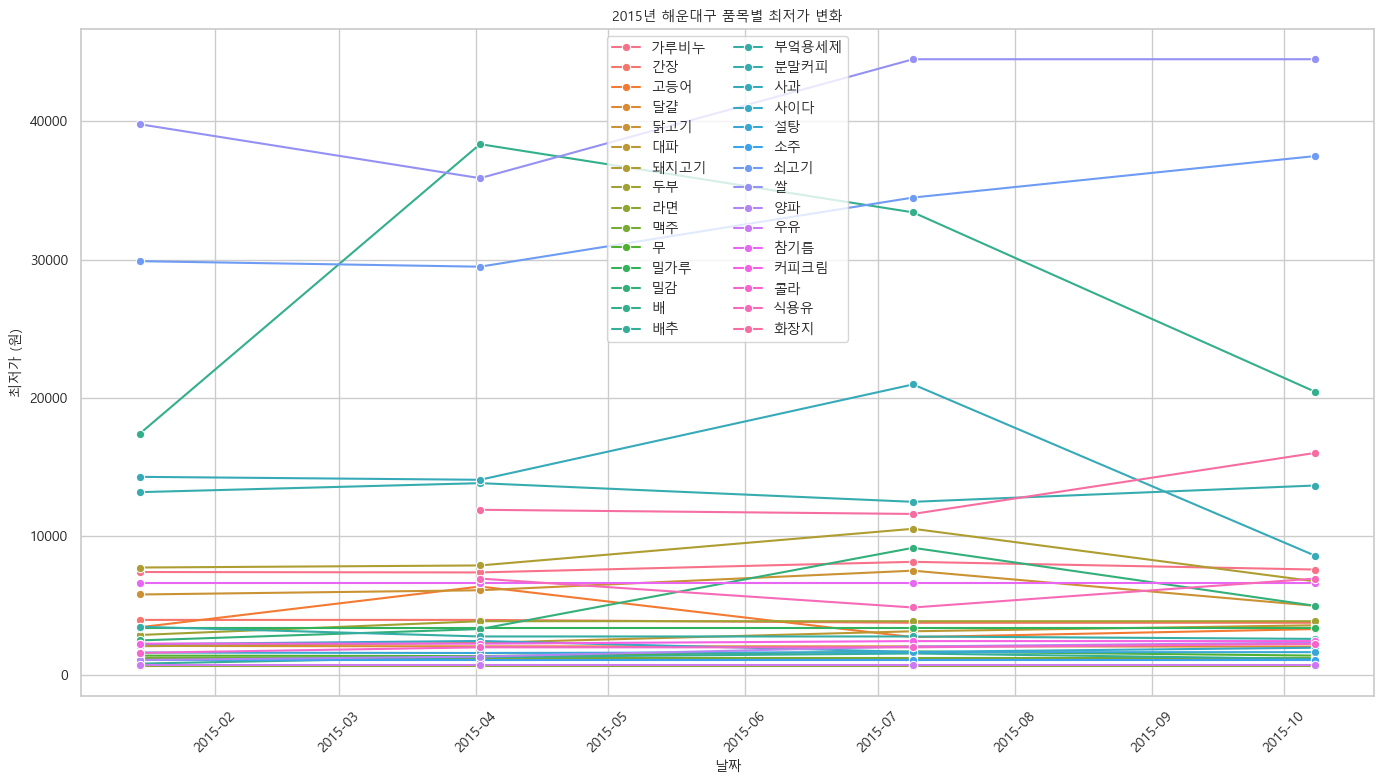

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_min.csv", index=False, encoding="utf-8-sig")

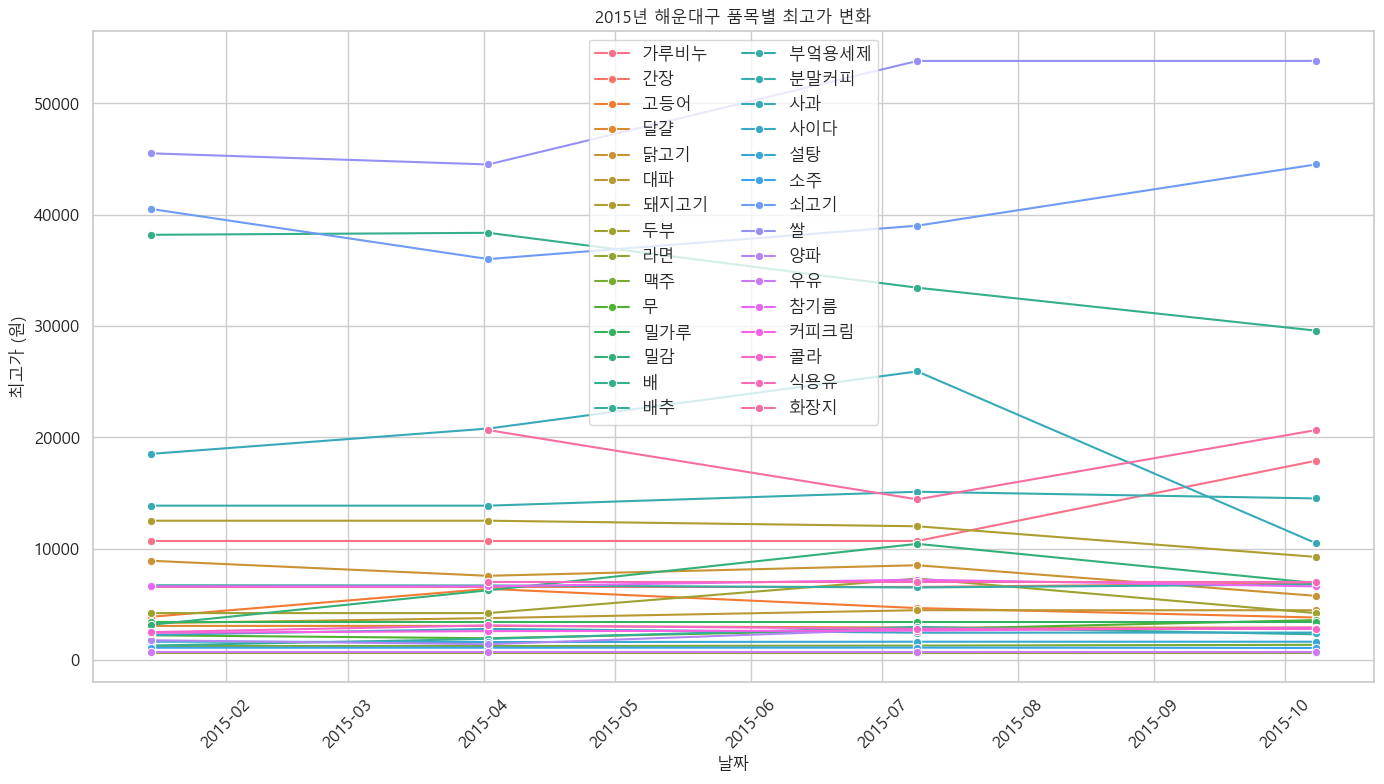

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_1q.csv")
q2 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_2q.csv")
q3 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_3q.csv")
q4 = pd.read_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2015ÎÖÑ Ìï¥Ïö¥ÎåÄÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Ìï¥Ïö¥ÎåÄÍµ¨2015_max.csv", index=False, encoding="utf-8-sig")